In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from pandas import DataFrame
from matplotlib import pyplot
from scipy.stats import norm 
from functools import reduce

# Standard plotly imports
from chart_studio import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
import plotly.figure_factory as ff
#dedicated functions for creating very specific types of plots

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_mxp = pd.read_csv('/Users/adamzsolt/Documents/CCT/CA2/CA2-CCT/FAOSTAT_data_5-4-2022-8.csv')
#https://www.fao.org/faostat/en/#data/TI
df_mxp

Unnamed: 0            Unnamed: 1     Unnamed: 2  \
0            NaN                   NaN            NaN   
1    1990 [1990]    Meat, cattle [867]   Hungary [97]   
2    1990 [1990]    Meat, cattle [867]  Ireland [104]   
3    1990 [1990]  Meat, chicken [1058]   Hungary [97]   
4    1990 [1990]  Meat, chicken [1058]  Ireland [104]   
..           ...                   ...            ...   
246  2020 [2020]      Meat, pig [1035]  Ireland [104]   
247  2020 [2020]     Meat, sheep [977]   Hungary [97]   
248  2020 [2020]     Meat, sheep [977]  Ireland [104]   
249          NaN                   NaN            NaN   
250          NaN                   NaN            NaN   

    Export Quantity Index (2014-2016 = 100) [495]  \
0                                            Unit   
1                                           index   
2                                           index   
3                                           index   
4                                           index   
..                                            ...   
246                                         index   
247                                         index   
248                                         index   
249                                           NaN   
250                                           NaN   

    Export Quantity Index (2014-2016 = 100) [495].1  \
0                                             Value   
1                                               304   
2                                                88   
3                                               100   
4                                                22   
..                                              ...   
246                                             108   
247                                             194   
248                                             130   
249                                             NaN   
250                                             NaN   

    Export Quantity Index (2014-2016 = 100) [495].2  \
0                                  Flag Description   
1                                   Calculated data   
2                                   Calculated data   
3                                   Calculated data   
4                                   Calculated data   
..                                              ...   
246                                 Calculated data   
247                                 Calculated data   
248                                 Calculated data   
249                                             NaN   
250                                             NaN   

    Export Unit/Value Index (2014-2016 = 100)  \
0                                        Unit   
1                                       index   
2                                       index   
3                                       index   
4                                       index   
..                                        ...   
246                                     index   
247                                     index   
248                                     index   
249                                       NaN   
250                                       NaN   

    Export Unit/Value Index (2014-2016 = 100).1  \
0                                         Value   
1                                            51   
2                                            50   
3                                            43   
4                                           110   
..                                          ...   
246                                         107   
247                                         101   
248                                         110   
249                                         NaN   
250                                         NaN   

    Export Unit/Value Index (2014-2016 = 100).2 Export Value Base Price [95]  \
0                              Flag Description                         Unit   


In [3]:
df_mxp.shape

(251, 33)

In [4]:
df_mxp.isnull().sum()

Unnamed: 0                                         3
Unnamed: 1                                         3
Unnamed: 2                                         3
Export Quantity Index (2014-2016 = 100) [495]      4
Export Quantity Index (2014-2016 = 100) [495].1    4
Export Quantity Index (2014-2016 = 100) [495].2    4
Export Unit/Value Index (2014-2016 = 100)          4
Export Unit/Value Index (2014-2016 = 100).1        4
Export Unit/Value Index (2014-2016 = 100).2        4
Export Value Base Price [95]                       4
Export Value Base Price [95].1                     4
Export Value Base Price [95].2                     4
Export Value Base Quantity [94]                    4
Export Value Base Quantity [94].1                  4
Export Value Base Quantity [94].2                  4
Export Value Index (2014-2016 = 100) [492]         3
Export Value Index (2014-2016 = 100) [492].1       3
Export Value Index (2014-2016 = 100) [492].2       3
Import Quantity Index (2014-2016 = 100) [465] 

In [5]:
df_mxp = df_mxp.dropna()

In [6]:
df_mxp.isnull().sum()

Unnamed: 0                                         0
Unnamed: 1                                         0
Unnamed: 2                                         0
Export Quantity Index (2014-2016 = 100) [495]      0
Export Quantity Index (2014-2016 = 100) [495].1    0
Export Quantity Index (2014-2016 = 100) [495].2    0
Export Unit/Value Index (2014-2016 = 100)          0
Export Unit/Value Index (2014-2016 = 100).1        0
Export Unit/Value Index (2014-2016 = 100).2        0
Export Value Base Price [95]                       0
Export Value Base Price [95].1                     0
Export Value Base Price [95].2                     0
Export Value Base Quantity [94]                    0
Export Value Base Quantity [94].1                  0
Export Value Base Quantity [94].2                  0
Export Value Index (2014-2016 = 100) [492]         0
Export Value Index (2014-2016 = 100) [492].1       0
Export Value Index (2014-2016 = 100) [492].2       0
Import Quantity Index (2014-2016 = 100) [465] 

In [7]:
df_mxp.shape

(242, 33)

In [8]:
df_mxp = df_mxp.iloc[:,[0,1,2,4,7,10,13,16]]

new_cols=['Year','Item','Country','Export_Quantity_Index','Export_Unit/Value_Index',
          'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index']

df_mxp.rename(columns=dict(zip(df_mxp.columns[0:], new_cols)),inplace=True)
df_mxp


df_mxp.head()

Year                  Item        Country Export_Quantity_Index  \
1  1990 [1990]    Meat, cattle [867]   Hungary [97]                   304   
2  1990 [1990]    Meat, cattle [867]  Ireland [104]                    88   
3  1990 [1990]  Meat, chicken [1058]   Hungary [97]                   100   
4  1990 [1990]  Meat, chicken [1058]  Ireland [104]                    22   
5  1990 [1990]      Meat, pig [1035]   Hungary [97]                   132   

  Export_Unit/Value_Index Export_Value_Base_Price Export_Value_Base_Quantity  \
1                      51                  110051                      18373   
2                      50                 1706663                     977585   
3                      43                  558710                     238479   
4                     110                   21097                     109103   
5                      55                  489006                     204559   

  Export_Value_Index  
1                155  
2                 45  
3                 43  
4                 24  
5                 73

In [9]:
df_mxp['Year'] = df_mxp['Year'].apply(lambda x: x[:4])
df_mxp['Item'] = df_mxp['Item'].apply(lambda x: x.split()[1])
df_mxp['Country'] = df_mxp['Country'].apply(lambda x: x.split()[0])
df_mxp.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
1  1990   cattle  Hungary                   304                      51   
2  1990   cattle  Ireland                    88                      50   
3  1990  chicken  Hungary                   100                      43   
4  1990  chicken  Ireland                    22                     110   
5  1990      pig  Hungary                   132                      55   

  Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index  
1                  110051                      18373                155  
2                 1706663                     977585                 45  
3                  558710                     238479                 43  
4                   21097                     109103                 24  
5                  489006                     204559                 73

In [10]:
df_mxp = df_mxp.sort_values(['Country','Year'], ascending=[True, True])
#using sort function I got the values in order by the year and the item name
df_mxp.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
1   1990   cattle  Hungary                   304                      51   
3   1990  chicken  Hungary                   100                      43   
5   1990      pig  Hungary                   132                      55   
9   1991   cattle  Hungary                   248                      53   
11  1991  chicken  Hungary                    61                      65   

   Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index  
1                   110051                      18373                155  
3                   558710                     238479                 43  
5                   489006                     204559                 73  
9                    89843                      19346                133  
11                  342389                     362597                 40

In [11]:
df_mxp.shape

(242, 8)

In [12]:
df_ppi = pd.read_csv('/Users/adamzsolt/Documents/CCT/CA2/CA2-CCT/FAOSTAT_data_5-5-2022.csv')
#https://www.fao.org/faostat/en/#data/PP
df_ppi.head()

Domain Code           Domain  Area Code (FAO)     Area  Element Code  \
0          PP  Producer Prices               97  Hungary          5539   
1          PP  Producer Prices               97  Hungary          5539   
2          PP  Producer Prices               97  Hungary          5539   
3          PP  Producer Prices               97  Hungary          5539   
4          PP  Producer Prices               97  Hungary          5539   

                                  Element  Item Code           Item  \
0  Producer Price Index (2014-2016 = 100)        867   Meat, cattle   
1  Producer Price Index (2014-2016 = 100)       1058  Meat, chicken   
2  Producer Price Index (2014-2016 = 100)       1035      Meat, pig   
3  Producer Price Index (2014-2016 = 100)        977    Meat, sheep   
4  Producer Price Index (2014-2016 = 100)        867   Meat, cattle   

   Year Code  Year  Months Code        Months  Unit  Value Flag  \
0       1995  1995         7021  Annual value   NaN     38   Im   
1       1995  1995         7021  Annual value   NaN     37   Im   
2       1995  1995         7021  Annual value   NaN     48   Im   
3       1995  1995         7021  Annual value   NaN     33   Im   
4       1996  1996         7021  Annual value   NaN     39   Im   

                           Flag Description  
0  FAO data based on imputation methodology  
1  FAO data based on imputation methodology  
2  FAO data based on imputation methodology  
3  FAO data based on imputation methodology  
4  FAO data based on imputation methodology

In [13]:
df_ppi = df_ppi[['Value','Item','Year','Area']]
df_ppi['Item'] = df_ppi['Item'].apply(lambda x: x.split()[1])
df_ppi = df_ppi.rename(columns={'Value':'PPI','Area':'Country'})
df_ppi.head()

PPI     Item  Year  Country
0   38   cattle  1995  Hungary
1   37  chicken  1995  Hungary
2   48      pig  1995  Hungary
3   33    sheep  1995  Hungary
4   39   cattle  1996  Hungary

In [14]:
df_livestock = pd.read_csv('/Users/adamzsolt/Documents/CCT/CA2/CA2-CCT/FAOSTAT_data_5-8-2022.csv')
df_livestock.head()

Domain Code                        Domain  Area Code (FAO)     Area  \
0         QCL  Crops and livestock products               97  Hungary   
1         QCL  Crops and livestock products               97  Hungary   
2         QCL  Crops and livestock products               97  Hungary   
3         QCL  Crops and livestock products               97  Hungary   
4         QCL  Crops and livestock products               97  Hungary   

   Element Code Element  Item Code (FAO)    Item  Year Code  Year  Unit  \
0          5111  Stocks              866  Cattle       1995  1995  Head   
1          5111  Stocks              866  Cattle       1996  1996  Head   
2          5111  Stocks              866  Cattle       1997  1997  Head   
3          5111  Stocks              866  Cattle       1998  1998  Head   
4          5111  Stocks              866  Cattle       1999  1999  Head   

    Value Flag Flag Description  
0  910000  NaN    Official data  
1  928000  NaN    Official data  
2  909000  NaN    Official data  
3  871000  NaN    Official data  
4  873000  NaN    Official data

In [15]:
df_livestock = df_livestock[['Value','Item','Year','Area']]
df_livestock = df_livestock.rename(columns={'Area':'Country','Value':'Livestock_value'})
df_livestock.head()

Livestock_value    Item  Year  Country
0           910000  Cattle  1995  Hungary
1           928000  Cattle  1996  Hungary
2           909000  Cattle  1997  Hungary
3           871000  Cattle  1998  Hungary
4           873000  Cattle  1999  Hungary

In [16]:
df_livestock = df_livestock.sort_values(['Country','Year'], ascending=[True, True])
#using sort function I got the values in order by the year and the item name
df_livestock.head()

Livestock_value      Item  Year  Country
0            910000    Cattle  1995  Hungary
26            33906  Chickens  1995  Hungary
52          4356000      Pigs  1995  Hungary
78           947000     Sheep  1995  Hungary
1            928000    Cattle  1996  Hungary

In [17]:
df_ppi.shape,df_mxp.shape,df_livestock.shape

((200, 4), (242, 8), (205, 4))

In [18]:
df_mxp['Year'] = df_mxp['Year'].astype(int)
df_ppi['Year'] = df_ppi['Year'].astype(int)
df_livestock['Year'] = df_livestock['Year'].astype(int)

dfs = [df_mxp,df_ppi,df_livestock]

df = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, on=['Year','Item','Country'],
                                              left_index=True, right_index=True, 
                                              how='outer'), dfs)
df.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
0  1995   cattle  Hungary                   NaN                     NaN   
1  1990   cattle  Hungary                   304                      51   
2  1990   cattle  Ireland                    88                      50   
3  1990  chicken  Hungary                   100                      43   
4  1990  chicken  Ireland                    22                     110   

  Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index   PPI  \
0                     NaN                        NaN                NaN  38.0   
1                  110051                      18373                155  37.0   
2                 1706663                     977585                 45  48.0   
3                  558710                     238479                 43  33.0   
4                   21097                     109103                 24  39.0   

   Livestock_value  
0         910000.0  
1         928000.0  
2         909000.0  
3         871000.0  
4         873000.0

In [19]:
df = df.dropna(axis=0)
df.isnull().sum()

Year                          0
Item                          0
Country                       0
Export_Quantity_Index         0
Export_Unit/Value_Index       0
Export_Value_Base_Price       0
Export_Value_Base_Quantity    0
Export_Value_Index            0
PPI                           0
Livestock_value               0
dtype: int64

In [20]:
df.shape

(193, 10)

In [21]:
df.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
1  1990   cattle  Hungary                   304                      51   
2  1990   cattle  Ireland                    88                      50   
3  1990  chicken  Hungary                   100                      43   
4  1990  chicken  Ireland                    22                     110   
5  1990      pig  Hungary                   132                      55   

  Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index   PPI  \
1                  110051                      18373                155  37.0   
2                 1706663                     977585                 45  48.0   
3                  558710                     238479                 43  33.0   
4                   21097                     109103                 24  39.0   
5                  489006                     204559                 73  48.0   

   Livestock_value  
1         928000.0  
2         909000.0  
3         871000.0  
4         873000.0  
5         857000.0

In [22]:
df.tail()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
195  2014  chicken  Hungary                    97                     112   
196  2014  chicken  Ireland                    82                     123   
197  2014      pig  Hungary                    97                     115   
198  2014      pig  Ireland                    89                     115   
199  2014    sheep  Hungary                    51                     118   

    Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index  \
195                  542469                     629427                109   
196                   79893                     122453                104   
197                  357956                     425631                111   
198                  408662                     532829                103   
199                     714                       1809                 65   

       PPI  Livestock_value  
195  105.0        4830000.0  
196   93.0        5170000.0  
197  103.0        5007000.0  
198   96.0        5096800.0  
199  114.0        5138700.0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1 to 199
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        193 non-null    int64  
 1   Item                        193 non-null    object 
 2   Country                     193 non-null    object 
 3   Export_Quantity_Index       193 non-null    object 
 4   Export_Unit/Value_Index     193 non-null    object 
 5   Export_Value_Base_Price     193 non-null    object 
 6   Export_Value_Base_Quantity  193 non-null    object 
 7   Export_Value_Index          193 non-null    object 
 8   PPI                         193 non-null    float64
 9   Livestock_value             193 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 16.6+ KB


In [24]:
df['Year'] = df['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y'))
df['Year'] = df['Year'].apply(lambda x: x.strftime('%Y'))

In [25]:
df.head()

Year     Item  Country Export_Quantity_Index Export_Unit/Value_Index  \
1  1990   cattle  Hungary                   304                      51   
2  1990   cattle  Ireland                    88                      50   
3  1990  chicken  Hungary                   100                      43   
4  1990  chicken  Ireland                    22                     110   
5  1990      pig  Hungary                   132                      55   

  Export_Value_Base_Price Export_Value_Base_Quantity Export_Value_Index   PPI  \
1                  110051                      18373                155  37.0   
2                 1706663                     977585                 45  48.0   
3                  558710                     238479                 43  33.0   
4                   21097                     109103                 24  39.0   
5                  489006                     204559                 73  48.0   

   Livestock_value  
1         928000.0  
2         909000.0  
3         871000.0  
4         873000.0  
5         857000.0

In [26]:
to_int = df.columns.drop(['Year','Country','Item'])
df[to_int] = df[to_int].apply(pd.to_numeric, errors='coerce').astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1 to 199
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        193 non-null    object
 1   Item                        193 non-null    object
 2   Country                     193 non-null    object
 3   Export_Quantity_Index       193 non-null    int64 
 4   Export_Unit/Value_Index     193 non-null    int64 
 5   Export_Value_Base_Price     193 non-null    int64 
 6   Export_Value_Base_Quantity  193 non-null    int64 
 7   Export_Value_Index          193 non-null    int64 
 8   PPI                         193 non-null    int64 
 9   Livestock_value             193 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 16.6+ KB


In [28]:
df.describe()

Export_Quantity_Index  Export_Unit/Value_Index  \
count             193.000000               193.000000   
mean               94.911917                90.554404   
std                82.313916                28.888766   
min                 2.000000                38.000000   
25%                55.000000                71.000000   
50%                79.000000                89.000000   
75%               109.000000               109.000000   
max               820.000000               200.000000   

       Export_Value_Base_Price  Export_Value_Base_Quantity  \
count             1.930000e+02                1.930000e+02   
mean              4.198114e+05                3.851174e+05   
std               6.313909e+05                4.480729e+05   
min               2.700000e+01                8.440000e+02   
25%               4.724500e+04                9.754000e+04   
50%               2.266080e+05                2.722240e+05   
75%               3.455520e+05                4.891660e+05   
max               2.815796e+06                2.235690e+06   

       Export_Value_Index         PPI  Livestock_value  
count          193.000000  193.000000     1.930000e+02  
mean            79.927461   81.642487     2.529288e+06  
std             60.268366   21.479197     2.526835e+06  
min              2.000000   33.000000     1.099100e+04  
25%             48.000000   67.000000     7.010000e+05  
50%             66.000000   80.000000     1.462000e+06  
75%             98.000000   97.000000     5.007000e+06  
max            643.000000  144.000000     7.555000e+06

In [29]:
domain1 = np.linspace(np.min(df['Export_Quantity_Index']), np.max(df['Export_Quantity_Index']))
domain2 = np.linspace(np.min(df['Export_Unit/Value_Index']), np.max(df['Export_Unit/Value_Index']))
domain3 = np.linspace(np.min(df['Export_Value_Base_Price']), np.max(df['Export_Value_Base_Price']))
domain4 = np.linspace(np.min(df['Export_Value_Base_Quantity']), np.max(df['Export_Value_Base_Quantity']))
domain5 = np.linspace(np.min(df['Export_Value_Index']), np.max(df['Export_Value_Index']))
domain6 = np.linspace(np.min(df['PPI']), np.max(df['PPI']))
domain7 = np.linspace(np.min(df['Livestock_value']), np.max(df['Livestock_value']))

average1 = df['Export_Quantity_Index'].mean()
mode1 = df['Export_Quantity_Index'].mode()
middle1 = df['Export_Quantity_Index'].median()
std1 = np.std(df['Export_Quantity_Index'], ddof=1)

average2 = df['Export_Unit/Value_Index'].mean()
mode2 = df['Export_Unit/Value_Index'].mode()
middle2 = df['Export_Unit/Value_Index'].median()
std2 = np.std(df['Export_Unit/Value_Index'], ddof=1)

average3 = df['Export_Value_Base_Price'].mean()
mode3 = df['Export_Value_Base_Price'].mode()
middle3 = df['Export_Value_Base_Price'].median()
std3 = np.std(df['Export_Value_Base_Price'], ddof=1)

average4 = df['Export_Value_Base_Quantity'].mean()
mode4 = df['Export_Value_Base_Quantity'].mode()
middle4 = df['Export_Value_Base_Quantity'].median()
std4 = np.std(df['Export_Value_Base_Quantity'], ddof=1)

average5 = df['Export_Value_Index'].mean()
mode5 = df['Export_Value_Index'].mode()
middle5= df['Export_Value_Index'].median()
std5 = np.std(df['Export_Value_Index'], ddof=1)

average6 = df['PPI'].mean()
mode6 = df['PPI'].mode()
middle6 = df['PPI'].median()
std6 = np.std(df['PPI'], ddof=1)

average7 = df['Livestock_value'].mean()
mode7 = df['Livestock_value'].mode()
middle7 = df['Livestock_value'].median()
std7 = np.std(df['Livestock_value'], ddof=1)

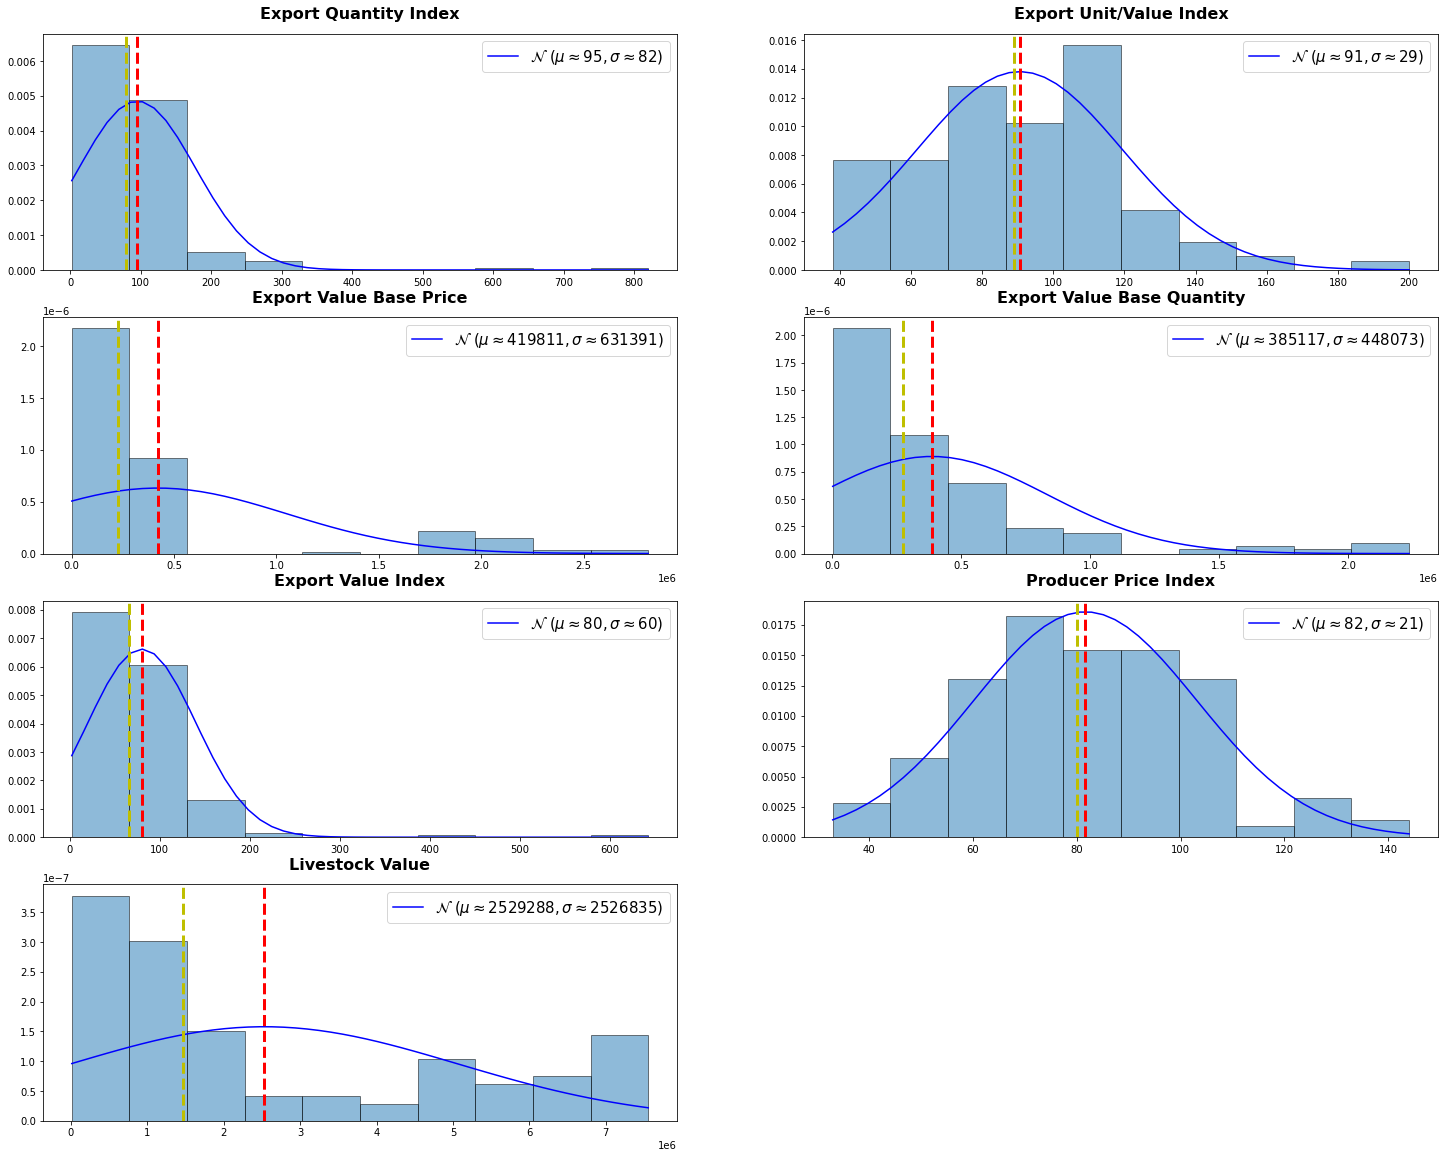

In [30]:
figure, (axs) =  plt.subplots(4,2, figsize=(25,20 ))

axs[0,0].plot(domain1, norm.pdf(domain1,average1,std1),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average1)} , \sigma \\approx {round(std1)} )$')
axs[0,0].axvline(average1, color='r', linestyle='dashed', linewidth=3)
axs[0,0].axvline(middle1, color='y', linestyle='dashed', linewidth=3)
axs[0,0].hist(df['Export_Quantity_Index'], edgecolor='black',alpha=.5,density=True)
axs[0,0].set_title('Export Quantity Index', fontsize=16, fontweight='bold',pad=15)
axs[0,0].legend(prop={"size":15})

axs[0,1].plot(domain2, norm.pdf(domain2,average2,std2),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average2)} , \sigma \\approx {round(std2)} )$')
axs[0,1].axvline(average2, color='r', linestyle='dashed', linewidth=3)
axs[0,1].axvline(middle2, color='y', linestyle='dashed', linewidth=3)
axs[0,1].hist(df['Export_Unit/Value_Index'], edgecolor='black',alpha=.5,density=True)
axs[0,1].set_title('Export Unit/Value Index', fontsize=16, fontweight='bold',pad=15)
axs[0,1].legend(prop={"size":15})

axs[1,0].plot(domain3, norm.pdf(domain3,average3,std3),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average3)} , \sigma \\approx {round(std3)} )$')
axs[1,0].axvline(average3, color='r', linestyle='dashed', linewidth=3)
axs[1,0].axvline(middle3, color='y', linestyle='dashed', linewidth=3)
axs[1,0].hist(df['Export_Value_Base_Price'], edgecolor='black',alpha=.5,density=True)
axs[1,0].set_title('Export Value Base Price', fontsize=16, fontweight='bold',pad=15)
axs[1,0].legend(prop={"size":15})

axs[1,1].plot(domain4, norm.pdf(domain4,average4,std4),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average4)} , \sigma \\approx {round(std4)} )$')
axs[1,1].axvline(average4, color='r', linestyle='dashed', linewidth=3)
axs[1,1].axvline(middle4, color='y', linestyle='dashed', linewidth=3)
axs[1,1].hist(df['Export_Value_Base_Quantity'], edgecolor='black',alpha=.5,density=True)
axs[1,1].set_title('Export Value Base Quantity', fontsize=16, fontweight='bold',pad=15)
axs[1,1].legend(prop={"size":15})

axs[2,0].plot(domain5, norm.pdf(domain5,average5,std5),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average5)} , \sigma \\approx {round(std5)} )$')
axs[2,0].axvline(average5, color='r', linestyle='dashed', linewidth=3)
axs[2,0].axvline(middle5, color='y', linestyle='dashed', linewidth=3)
axs[2,0].hist(df['Export_Value_Index'], edgecolor='black',alpha=.5,density=True)
axs[2,0].set_title('Export Value Index', fontsize=16, fontweight='bold',pad=15)
axs[2,0].legend(prop={"size":15})

axs[2,1].plot(domain6, norm.pdf(domain6,average6,std6),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average6)} , \sigma \\approx {round(std6)} )$')
axs[2,1].axvline(average6, color='r', linestyle='dashed', linewidth=3)
axs[2,1].axvline(middle6, color='y', linestyle='dashed', linewidth=3)
axs[2,1].hist(df['PPI'], edgecolor='black',alpha=.5,density=True)
axs[2,1].set_title('Producer Price Index', fontsize=16, fontweight='bold',pad=15)
axs[2,1].legend(prop={"size":15})

axs[3,0].plot(domain7, norm.pdf(domain7,average7,std7),color='blue',
        label='$\mathcal{N}$ '+f'$( \mu \\approx {round(average7)} , \sigma \\approx {round(std7)} )$')
axs[3,0].axvline(average7, color='r', linestyle='dashed', linewidth=3)
axs[3,0].axvline(middle7, color='y', linestyle='dashed', linewidth=3)
axs[3,0].hist(df['Livestock_value'], edgecolor='black',alpha=.5,density=True)
axs[3,0].set_title('Livestock Value', fontsize=16, fontweight='bold',pad=15)
axs[3,0].legend(prop={"size":15})

axs[3,1].set_axis_off()
plt.show();

In [31]:
vars = ['Export_Quantity_Index','Export_Unit/Value_Index',
    'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value']

fig = make_subplots(rows=3, cols=3)
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df[var],
        name=var),
        row=(i//3)+1, col=(i%3)+1
    )
fig.update_layout(width=1000, height=1500)
fig.update_traces(boxpoints='all', jitter=.3)

In [32]:
#def clean_data(df):
    #for col in df.columns:
        #if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            #Q1 = df[col].quantile(0.25)
            #Q3 = df[col].quantile(0.75)
            #IQR = Q3 - Q1
            #df=df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
    #return df

#df = clean_data(df)

Export_Quantity_Index  Export_Unit/Value_Index  \
Export_Quantity_Index                    1.000000                -0.327748   
Export_Unit/Value_Index                 -0.327748                 1.000000   
Export_Value_Base_Price                  0.019949                -0.362943   
Export_Value_Base_Quantity              -0.134179                -0.043197   
Export_Value_Index                       0.909695                 0.033940   
PPI                                      0.014261                 0.071180   
Livestock_value                         -0.060786                 0.174827   

                            Export_Value_Base_Price  \
Export_Quantity_Index                      0.019949   
Export_Unit/Value_Index                   -0.362943   
Export_Value_Base_Price                    1.000000   
Export_Value_Base_Quantity                 0.810246   
Export_Value_Index                        -0.117004   
PPI                                        0.047566   
Livestock_value                           -0.051661   

                            Export_Value_Base_Quantity  Export_Value_Index  \
Export_Quantity_Index                        -0.134179            0.909695   
Export_Unit/Value_Index                      -0.043197            0.033940   
Export_Value_Base_Price                       0.810246           -0.117004   
Export_Value_Base_Quantity                    1.000000           -0.137705   
Export_Value_Index                           -0.137705            1.000000   
PPI                                           0.063987            0.078416   
Livestock_value                               0.000366            0.027722   

                                 PPI  Livestock_value  
Export_Quantity_Index       0.014261        -0.060786  
Export_Unit/Value_Index     0.071180         0.174827  
Export_Value_Base_Price     0.047566        -0.051661  
Export_Value_Base_Quantity  0.063987         0.000366  
Export_Value_Index          0.078416         0.027722  
PPI                         1.000000         0.101155  
Livestock_value             0.101155         1.000000

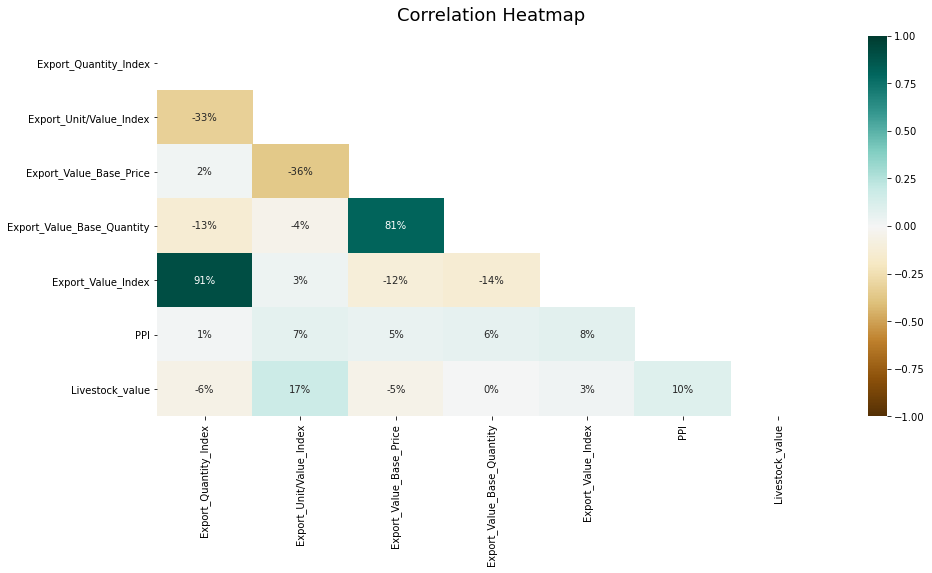

In [33]:
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df.corr(method = "pearson"), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt='.0%', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=15);
df.corr()

In [34]:
fig = px.scatter(df, x='Export_Value_Index', y='Export_Quantity_Index', color='Item', 
                 trendline="ols", trendline_scope="overall",facet_col="Country",
                 width=900, height=450)

fig.show()

In [35]:
fig = px.scatter(df, x='Export_Value_Base_Quantity', y='Export_Value_Base_Price', color='Item', 
                 trendline="ols", trendline_scope="overall", facet_col="Country",
                 width=900, height=450)
fig.show()

In [36]:
df_hu = df[df['Country']=='Hungary']
df_ire = df[df['Country']=='Ireland']

In [37]:
df_hu.shape

(94, 10)

In [38]:
df_hu_lstock = df_hu['Livestock_value'][0:50]
df_ire_lstock = df_ire['Livestock_value'][0:50]

In [39]:
from numpy import mean
from numpy import std

print('Livestock_IRE: mean=%.2f stdv=%.2f' % (mean(df_ire_lstock), std(df_ire_lstock)))
print('Livestock_HUN: mean=%.2f stdv=%.2f' % (mean(df_hu_lstock), std(df_hu_lstock)))

Livestock_IRE: mean=1495589.76 stdv=1584737.10
Livestock_HUN: mean=1686157.32 stdv=1823327.90


In [40]:
fig = px.histogram(df, x="Livestock_value", facet_col="Country", nbins=10, 
                   color_discrete_sequence=['#6a76fc'], title='Livestock distribution by Country')
fig.add_vline(x=df_hu_lstock.mean(), line_width=2, line_dash="dash", line_color="green", col=1)
fig.add_vline(x=df_ire_lstock.mean(), line_width=2, line_dash="dash", line_color="green", col=2)
fig.show()

## Parametric Statistical Significance Tests

### Student’s t-Test

In [41]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(df_ire_lstock, df_hu_lstock)
print('Statistics=%.2f, p=%.2f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-0.55, p=0.58
Same distributions (fail to reject H0)


### Paired Student’s t-Test

In [42]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(df_ire_lstock, df_hu_lstock)
print('Statistics=%.2f, p=%.2f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-0.83, p=0.41
Same distributions (fail to reject H0)


### Analysis of Variance Test (ANOVA)

In [43]:
from scipy.stats import f_oneway

stat, p = f_oneway(df_ire_lstock, df_hu_lstock)
print('Statistics=%.2f, p=%.2f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=0.30, p=0.58
Same distributions (fail to reject H0)


## Nonparametric Statistical Significance Tests

### Mann-Whitney U Test

In [44]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df_ire_lstock, df_hu_lstock)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1158.000, p=0.264
Same distribution (fail to reject H0)


### Wilcoxon signed-rank test

In [45]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(df_ire_lstock, df_hu_lstock)
print('Statistics=%.2f, p=%.2f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=570.00, p=0.51
Same distribution (fail to reject H0)


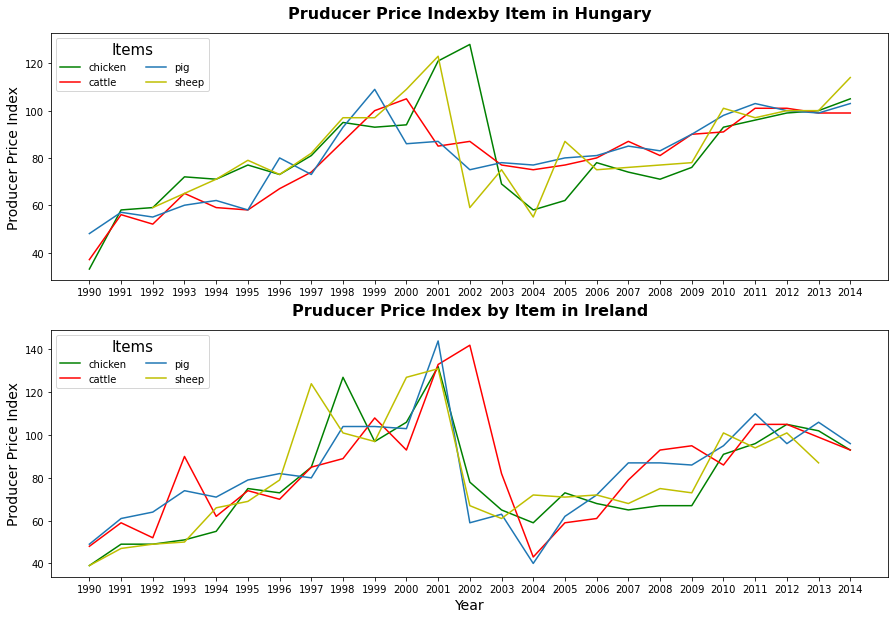

In [46]:
figure, (ax1,ax2) =  plt.subplots(2, figsize=(15,10 ))

df_hu.set_index('Year', inplace=True)
ax1.plot(df_hu.loc[df_hu["Item"] =='chicken', "PPI"], 'g', label='chicken')
ax1.plot(df_hu.loc[df_hu["Item"] =='cattle', "PPI"], 'r', label='cattle')
ax1.plot(df_hu.loc[df_hu["Item"] =='pig', "PPI"], label='pig')
ax1.plot(df_hu.loc[df_hu["Item"] =='sheep', "PPI"], 'y', label='sheep')
ax1.set_title('Pruducer Price Indexby Item in Hungary', fontweight='bold', fontsize=16, pad=15)
ax1.set_ylabel('Producer Price Index', fontsize=14)
ax1.legend(title='Items', title_fontsize=15, ncol=2, loc='upper left')

df_ire.set_index('Year', inplace=True)
ax2.plot(df_ire.loc[df_ire["Item"] =='chicken', "PPI"], 'g', label='chicken')
ax2.plot(df_ire.loc[df_ire["Item"] =='cattle', "PPI"], 'r', label='cattle')
ax2.plot(df_ire.loc[df_ire["Item"] =='pig', "PPI"], label='pig')
ax2.plot(df_ire.loc[df_ire["Item"] =='sheep', "PPI"], 'y', label='sheep')
ax2.set_title('Pruducer Price Index by Item in Ireland', fontweight='bold', fontsize=16, pad=15)
ax2.set_ylabel('Producer Price Index', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
ax2.legend(title='Items', title_fontsize=15, ncol=2, loc='upper left')

plt.show()

In [47]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import Dropdown

def scatter_plot_int_with_hue(x = 'Export_Value_Index',y = 'Export_Quantity_Index', hue = 'Country'):
    plt.figure(dpi=120)
    sns.set_style('whitegrid')
    return sns.scatterplot(data = df, x = x, y = y, alpha = 0.6, 
                           hue = hue, cmap = 'Set2',legend='full').set_title('Scatter plot for numeric variables', pad=15)

b = interact(scatter_plot_int_with_hue,
             x = widgets.Dropdown(
                 options = ['Export_Quantity_Index','Export_Unit/Value_Index',
    'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value']
                 ),
             y = widgets.Dropdown(
                 options = ['Export_Quantity_Index','Export_Unit/Value_Index',
    'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value']
                 ),
              hue = widgets.Dropdown(
                 options = ['Country', 'Item']
                 )
            )

interactive(children=(Dropdown(description='x', options=('Export_Quantity_Index', 'Export_Unit/Value_Index', '…

In [48]:
def cat_plot_int_with_hue( y='PPI'):
    sns.set_theme(font_scale=1.2)
   
    return sns.catplot(x = 'Country', y = y, hue='Item', kind='bar', data=df, height=5, aspect=2, palette="Set2").set(title='Country comparison by numericals')
    

a = interact(cat_plot_int_with_hue,
             y = widgets.Dropdown(
                 options = ['Export_Quantity_Index','Export_Unit/Value_Index',
    'Export_Value_Base_Price','Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value'], description='Numericals'
                 )
            ) 


interactive(children=(Dropdown(description='Numericals', options=('Export_Quantity_Index', 'Export_Unit/Value_…

## Standard Scaler

In [49]:
from sklearn.preprocessing import StandardScaler

features = df[['Export_Quantity_Index','Export_Value_Base_Price','Export_Value_Base_Quantity',
       'Export_Value_Index','PPI','Livestock_value','Export_Unit/Value_Index']]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[['Export_Quantity_Index','Export_Value_Base_Price','Export_Value_Base_Quantity',
       'Export_Value_Index','PPI','Livestock_value','Export_Unit/Value_Index']] = features
df.head()

Year     Item  Country  Export_Quantity_Index  Export_Unit/Value_Index  \
1  1990   cattle  Hungary               2.546737                -1.372758   
2  1990   cattle  Ireland              -0.084189                -1.407463   
3  1990  chicken  Hungary               0.061974                -1.650402   
4  1990  chicken  Ireland              -0.888082                 0.674870   
5  1990      pig  Hungary               0.451741                -1.233935   

   Export_Value_Base_Price  Export_Value_Base_Quantity  Export_Value_Index  \
1                -0.491876                   -0.820622            1.248877   
2                 2.043423                    1.325696           -0.581039   
3                 0.220560                   -0.328116           -0.614311   
4                -0.633128                   -0.617606           -0.930387   
5                 0.109876                   -0.404015           -0.115243   

        PPI  Livestock_value  
1 -2.083811        -0.635361  
2 -1.570356        -0.642900  
3 -2.270522        -0.657977  
4 -1.990456        -0.657184  
5 -1.570356        -0.663532

## Encoding

In [50]:
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder()

new_df = encoder.fit_transform(df[["Item", 'Country']])
new_df[['Export_Quantity_Index','Export_Unit/Value_Index','Export_Value_Base_Price',
        'Export_Value_Base_Quantity','Export_Value_Index','PPI','Livestock_value']] = df[['Export_Quantity_Index','Export_Unit/Value_Index',
                                                                                          'Export_Value_Base_Price','Export_Value_Base_Quantity',
                                                                                          'Export_Value_Index','PPI','Livestock_value']]
new_df.head()

Item  Country  Export_Quantity_Index  Export_Unit/Value_Index  \
1     1        1               2.546737                -1.372758   
2     1        2              -0.084189                -1.407463   
3     2        1               0.061974                -1.650402   
4     2        2              -0.888082                 0.674870   
5     3        1               0.451741                -1.233935   

   Export_Value_Base_Price  Export_Value_Base_Quantity  Export_Value_Index  \
1                -0.491876                   -0.820622            1.248877   
2                 2.043423                    1.325696           -0.581039   
3                 0.220560                   -0.328116           -0.614311   
4                -0.633128                   -0.617606           -0.930387   
5                 0.109876                   -0.404015           -0.115243   

        PPI  Livestock_value  
1 -2.083811        -0.635361  
2 -1.570356        -0.642900  
3 -2.270522        -0.657977  
4 -1.990456        -0.657184  
5 -1.570356        -0.663532

In [51]:
new_df.shape

(193, 9)

## Machine Learning models

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [53]:
X = new_df.drop(['Export_Unit/Value_Index'], axis=1)

y = df['Export_Unit/Value_Index']

X.shape, y.shape

((193, 8), (193,))

In [54]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [55]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((129, 8), (64, 8), (129,), (64,))

In [56]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### Linear Regression

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_lr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.36151786079517934
MSE: 0.3828577243599628
RMSE: 0.6187549792607432
R2 Square 0.6206067650651406
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.27094825216503554
MSE: 0.1800889008756759
RMSE: 0.4243688264654649
R2 Square 0.8182707634448534
__________________________________


### Ridge Regression

In [58]:
rg = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
rg.fit(X_train, y_train)
pred = rg.predict(X_test)

test_pred = rg.predict(X_test)
train_pred = rg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_rg = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.6622771482224372
MSE: 0.7537180383503645
RMSE: 0.8681693604074983
R2 Square 0.25310237562388616
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.6565617731073746
MSE: 0.6607288672142448
RMSE: 0.8128523034440174
R2 Square 0.3332528988464185
__________________________________


### Elastic Net

In [59]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

test_pred = gbr.predict(X_test)
train_pred = gbr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_en = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.31185650611528254
MSE: 0.2378791515801813
RMSE: 0.48772856342455617
R2 Square 0.7642734229995267
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03982859922453783
MSE: 0.002360341988771195
RMSE: 0.048583350942181774
R2 Square 0.9976181588896221
__________________________________


### Random Forest Regressor

In [60]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

test_pred = rfr.predict(X_test)
train_pred = rfr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_rfr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.34249018088616195
MSE: 0.25034287483878587
RMSE: 0.5003427573561806
R2 Square 0.7519224842942416
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.10377527076363632
MSE: 0.030612502704141644
RMSE: 0.17496428979692297
R2 Square 0.969108664007525
__________________________________


### Extra Trees Regressor

In [61]:
etr = ExtraTreesRegressor(n_estimators=1000)
etr.fit(X_train, y_train)

test_pred = etr.predict(X_test)
train_pred = etr.predict(X_train)

print('Test set evaluation:\n_________________________         ____________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_etr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_________________________         ____________
MAE: 0.24835460609725504
MSE: 0.146296098595211
RMSE: 0.3824867299596301
R2 Square 0.8550277385752791
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.285692370058922e-15
MSE: 1.6853608723842572e-28
RMSE: 1.2982144939817368e-14
R2 Square 1.0
__________________________________


### Support Vector Machine

In [62]:
svm = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm.fit(X_train, y_train)

test_pred = svm.predict(X_test)
train_pred = svm.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_svm = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.2793279501375612
MSE: 0.2931182395810664
RMSE: 0.5414039523138582
R2 Square 0.7095341949310783
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010198647644358472
MSE: 1.127119613500433e-06
RMSE: 0.0010616588969628773
R2 Square 0.999998862614043
__________________________________


In [63]:
models_scores_table = pd.DataFrame({'Linear Regression':results_lr,
                                       'Ridge Regression':results_rg,
                                       'Elastic Net':results_en,
                                        'Random Forest Regressior':results_rfr,
                                        'Extra Trees Regressior':results_etr,
                                        'Support Vector Machine':results_svm},
                                   index=['MAE', 'MSE', 'RMSE', 'R2 Square'])
    
    # Add 'Best Score' column
models_scores_table['Best Score'] = models_sco res_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
models_scores_table.head()

Linear Regression  Ridge Regression  Elastic Net  \
MAE                 0.361518          0.662277     0.311857   
MSE                 0.382858          0.753718     0.237879   
RMSE                0.618755          0.868169     0.487729   
R2 Square           0.620607          0.253102     0.764273   

           Random Forest Regressior  Extra Trees Regressior  \
MAE                        0.342490                0.248355   
MSE                        0.250343                0.146296   
RMSE                       0.500343                0.382487   
R2 Square                  0.751922                0.855028   

           Support Vector Machine              Best Score  
MAE                      0.279328        Ridge Regression  
MSE                      0.293118        Ridge Regression  
RMSE                     0.541404        Ridge Regression  
R2 Square                0.709534  Extra Trees Regressior

In [64]:
models_scores_table.drop(['Best Score'],axis=1, inplace=True)

models = ['Linear Regression','Ridge Regression',
'Elastic Net','Random Forest\nRegressior',
'Extra Trees\nRegressior','Support Vector\nMachine']

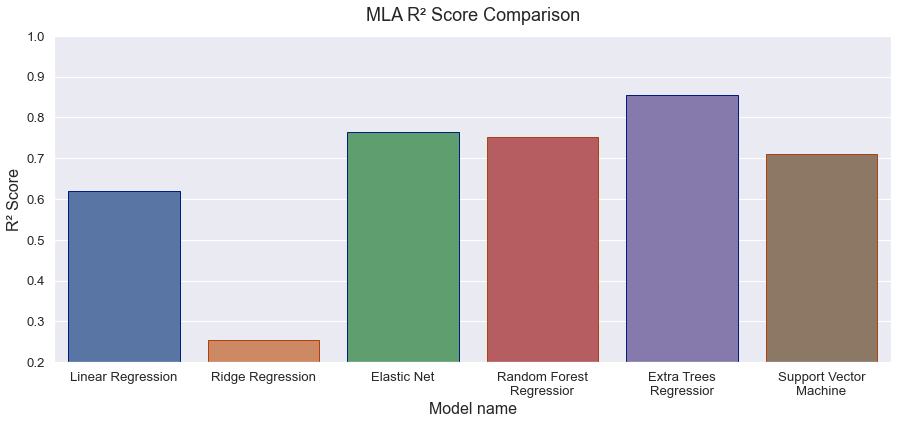

In [65]:
plt.subplots(figsize=(15,6))
plt.ylim([0.2,1])
sns.barplot(models,models_scores_table.iloc[3],edgecolor=sns.color_palette('dark',2))
plt.xticks()
plt.title('MLA R² Score Comparison', fontsize=18, pad=15)
plt.xlabel('Model name', fontsize=16)
plt.ylabel('R² Score', fontsize=16);

## Hyperparameter tuning with Grid Search

### Ridge Regression

In [66]:
# define parameters

param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}

In [67]:
# define search
search_rg = GridSearchCV(rg, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=10)
# execute search
result_trg = search_rg.fit(X, y)
# summarize result
print('Best Hyperparameters: %s' % result_trg.best_params_)

Best Hyperparameters: {'alpha': 1e-05, 'fit_intercept': False, 'normalize': True, 'solver': 'svd'}


In [68]:
tunned_rg = Ridge(alpha=1e-05, fit_intercept=False, normalize=True, solver='svd')
tunned_rg.fit(X_train, y_train)
pred = tunned_rg.predict(X_test)

test_pred = tunned_rg.predict(X_test)
train_pred = tunned_rg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_rg = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.36050102454463
MSE: 0.38276235360857014
RMSE: 0.6186779078070996
R2 Square 0.6207012728041434
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.26958044826781424
MSE: 0.18020565689718784
RMSE: 0.42450636850015316
R2 Square 0.8181529439537608
__________________________________


### Elastic Net

In [69]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

search_gbr = GridSearchCV(gbr, param_grid = parameters, cv = 10, n_jobs=-1)

result_ten = search_gbr.fit(X_train, y_train)

print("\n The best parameters across ALL searched params:\n",result_ten.best_params_)


 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}


In [70]:
tunned_gbr = GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=500, subsample=0.2)
tunned_gbr.fit(X_train, y_train)

test_pred = tunned_gbr.predict(X_test)
train_pred = tunned_gbr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_en = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.26007638306674874
MSE: 0.19002930586692945
RMSE: 0.435923509192759
R2 Square 0.8116902742244382
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.025469616787766415
MSE: 0.0025849643226150253
RMSE: 0.05084254441523384
R2 Square 0.9973914905883321
__________________________________


### Random Forest Regressor

In [71]:
search_gsc = GridSearchCV(estimator=RandomForestRegressor(),
            param_grid={
            'max_depth': range(1,10),
            'n_estimators': (10, 50, 100, 1000, 10000),
        },
        cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
result_trfr = search_gbr.fit(X_train, y_train)

print("\n The best parameters across ALL searched params:\n",result_trfr.best_params_)


 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}


In [72]:
tunned_rfr = RandomForestRegressor(max_depth= 4, n_estimators= 1500)
tunned_rfr.fit(X_train, y_train)

test_pred = tunned_rfr.predict(X_test)
train_pred = tunned_rfr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_rfr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.45886987645949234
MSE: 0.3709002799796529
RMSE: 0.6090158290058255
R2 Square 0.6324560062227622
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.25991127326483643
MSE: 0.11820678055232761
RMSE: 0.34381212973414366
R2 Square 0.8807165356612062
__________________________________


### Extra Trees Regressor

In [73]:
param_etr = {
    'n_estimators': [10,50,100,1000,10000],
    'criterion': ['mse', 'mae'],
    'max_depth': [2,8,16,32,50],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
}
search_etr = GridSearchCV(etr,param_etr,cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
result_tetr = search_gbr.fit(X_train, y_train)

print("\n The best parameters across ALL searched params:\n",result_tetr.best_params_)


 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}


In [74]:
tunned_etr = ExtraTreesRegressor(n_estimators=1000)
tunned_etr.fit(X_train, y_train)

test_pred = tunned_etr.predict(X_test)
train_pred = tunned_etr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_etr = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.24648375956441576
MSE: 0.14615401787510135
RMSE: 0.38230095196729674
R2 Square 0.855168533603287
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.285692370058922e-15
MSE: 1.6853608723842572e-28
RMSE: 1.2982144939817368e-14
R2 Square 1.0
__________________________________


### Support Vector Machine

In [75]:
param_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

search_svc = GridSearchCV(svm, param_svc, refit=True, verbose=0)
result_svc = search_svc.fit(X_train, y_train)

print("\n The best parameters across ALL searched params:\n",result_svc.best_params_)


 The best parameters across ALL searched params:
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [76]:
tunned_svm = SVR(kernel='rbf', C=10, epsilon=0.1)
tunned_svm.fit(X_train, y_train)

test_pred = tunned_svm.predict(X_test)
train_pred = tunned_svm.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_tunned_svm = ([*evaluate(y_test, test_pred)])

Test set evaluation:
_____________________________________
MAE: 0.21724186740457116
MSE: 0.19637112875493834
RMSE: 0.44313782139977437
R2 Square 0.805405838655356
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.118619513839631
MSE: 0.07164942046380703
RMSE: 0.2676740937479887
R2 Square 0.9276979624108249
__________________________________


In [77]:
tunned_models_scores_table = pd.DataFrame({'Ridge Regression':results_tunned_rg,
                                       'Elastic Net':results_tunned_en,
                                        'Random Forest Regressior':results_tunned_rfr,
                                        'Extra Trees Regressior':results_tunned_etr,
                                        'Support Vector Machine':results_tunned_svm},
                                   index=['MAE', 'MSE', 'RMSE', 'R2 Square'])
    
    # Add 'Best Score' column
tunned_models_scores_table['Best Score'] = tunned_models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
tunned_models_scores_table.head()

Ridge Regression  Elastic Net  Random Forest Regressior  \
MAE                0.360501     0.260076                  0.458870   
MSE                0.382762     0.190029                  0.370900   
RMSE               0.618678     0.435924                  0.609016   
R2 Square          0.620701     0.811690                  0.632456   

           Extra Trees Regressior  Support Vector Machine  \
MAE                      0.246484                0.217242   
MSE                      0.146154                0.196371   
RMSE                     0.382301                0.443138   
R2 Square                0.855169                0.805406   

                         Best Score  
MAE        Random Forest Regressior  
MSE                Ridge Regression  
RMSE               Ridge Regression  
R2 Square    Extra Trees Regressior

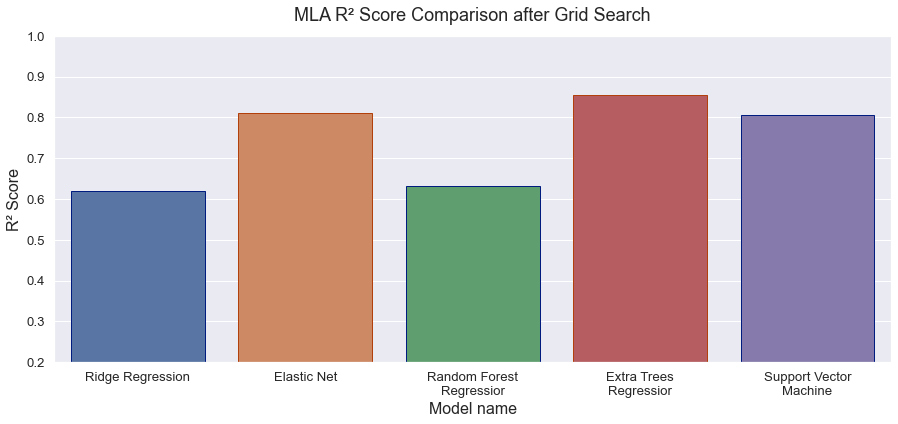

In [78]:
tunned_models_scores_table.drop(['Best Score'],axis=1, inplace=True)
tunned_models = ['Ridge Regression','Elastic Net','Random Forest\nRegressior',
                 'Extra Trees\nRegressior','Support Vector\nMachine']

plt.subplots(figsize=(15,6))
plt.ylim([0.2,1])
sns.barplot(tunned_models,tunned_models_scores_table.iloc[3],edgecolor=sns.color_palette('dark',2))
plt.xticks()
plt.title('MLA R² Score Comparison after Grid Search', fontsize=18, pad=15)
plt.xlabel('Model name', fontsize=16)
plt.ylabel('R² Score', fontsize=16);

## Sentiment Analysis

In [79]:
import snscrape.modules.twitter as sntwitter
import re
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [80]:
query = 'livestock ireland'
tweets = []
limit = 5000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweets.append(tweet)
        
df_tweets = pd.DataFrame(tweets)


In [81]:
df_tweets.head()

url  \
0  https://twitter.com/xtremem23/status/152688443...   
1  https://twitter.com/AgrilandIreland/status/152...   
2  https://twitter.com/AgrilandIreland/status/152...   
3  https://twitter.com/AgrilandIreland/status/152...   
4  https://twitter.com/Gion_Gion/status/152661321...   

                       date  \
0 2022-05-18 11:16:32+00:00   
1 2022-05-17 23:53:34+00:00   
2 2022-05-17 23:31:56+00:00   
3 2022-05-17 20:26:16+00:00   
4 2022-05-17 17:18:49+00:00   

                                             content  \
0  @Obohobofromnobo Its not impossible lol.\nHow ...   
1  "We need to actively encourage more partnershi...   
2  'The conclusion has been drawn that reducing I...   
3  The data shows the 'sizeable livestock populat...   
4  .So we had our mineral rights gifted for a son...   

                                     renderedContent                   id  \
0  @Obohobofromnobo Its not impossible lol.\nHow ...  1526884435634929666   
1  "We need to actively encourage more partnershi...  1526712563811205121   
2  'The conclusion has been drawn that reducing I...  1526707119680004097   
3  The data shows the 'sizeable livestock populat...  1526660395070529543   
4  .So we had our mineral rights gifted for a son...  1526613219913175040   

                                                user  replyCount  \
0  {'username': 'xtremem23', 'id': 72073141833944...           0   
1  {'username': 'AgrilandIreland', 'id': 13430381...           0   
2  {'username': 'AgrilandIreland', 'id': 13430381...           0   
3  {'username': 'AgrilandIreland', 'id': 13430381...           0   
4  {'username': 'Gion_Gion', 'id': 63195884, 'dis...           1   

   retweetCount  likeCount  quoteCount  ...  media retweetedTweet quotedTweet  \
0             0          0           0  ...   None           None        None   
1             0          0           0  ...   None           None        None   
2             1          1           0  ...   None           None        None   
3             0          0           0  ...   None           None        None   
4             0          1           0  ...   None           None        None   

  inReplyToTweetId                                      inReplyToUser  \
0     1.526864e+18  {'username': 'Obohobofromnobo', 'id': 98023839...   
1              NaN                                               None   
2              NaN                                               None   
3              NaN                                               None   
4              NaN                                               None   

                                      mentionedUsers coordinates place  \
0  [{'username': 'Obohobofromnobo', 'id': 9802383...        None  None   
1                                               None        None  None   
2                                               None        None  None   
3                                               None        None  None   
4                                               None        None  None   

  hashtags cashtags  
0     None     None  
1     None     None  
2     None     None  
3     None     None  
4     None     None  

[5 rows x 27 columns]

In [82]:
df_tweets.shape

(4983, 27)

In [83]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   url               4983 non-null   object             
 1   date              4983 non-null   datetime64[ns, UTC]
 2   content           4983 non-null   object             
 3   renderedContent   4983 non-null   object             
 4   id                4983 non-null   int64              
 5   user              4983 non-null   object             
 6   replyCount        4983 non-null   int64              
 7   retweetCount      4983 non-null   int64              
 8   likeCount         4983 non-null   int64              
 9   quoteCount        4983 non-null   int64              
 10  conversationId    4983 non-null   int64              
 11  lang              4983 non-null   object             
 12  source            4983 non-null   object             
 13  sou

In [84]:
df_tweets.describe()

id   replyCount  retweetCount     likeCount   quoteCount  \
count  4.983000e+03  4983.000000   4983.000000   4983.000000  4983.000000   
mean   1.081612e+18     0.821593      3.200883     10.007827     0.297010   
std    3.600667e+17    15.940742    109.398514    362.114542     9.436156   
min    2.635784e+08     0.000000      0.000000      0.000000     0.000000   
25%    9.366063e+17     0.000000      0.000000      0.000000     0.000000   
50%    1.171870e+18     0.000000      0.000000      0.000000     0.000000   
75%    1.356993e+18     1.000000      1.000000      2.000000     0.000000   
max    1.526884e+18  1112.000000   7685.000000  25468.000000   661.000000   

       conversationId  inReplyToTweetId  
count    4.983000e+03      1.844000e+03  
mean     1.078992e+18      1.212463e+18  
std      3.600128e+17      2.570975e+17  
min      2.635784e+08      2.228987e+09  
25%      9.225164e+17      1.093014e+18  
50%      1.170283e+18      1.256362e+18  
75%      1.354830e+18      1.408800e+18  
max      1.526713e+18      1.526864e+18

In [85]:
df_fil_tweets = df_tweets[['id','content']]
df_fil_tweets.head()

id                                            content
0  1526884435634929666  @Obohobofromnobo Its not impossible lol.\nHow ...
1  1526712563811205121  "We need to actively encourage more partnershi...
2  1526707119680004097  'The conclusion has been drawn that reducing I...
3  1526660395070529543  The data shows the 'sizeable livestock populat...
4  1526613219913175040  .So we had our mineral rights gifted for a son...

In [86]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def clean_text(text):
    #First, let's make the text lowercase.
    text = text.lower()
    
    # remove numbers
    text = re.sub(r'\d+', '', text)
    
    #Next, let's remove exclamation marks.
    text_list = text.split('!') #This returns a list of items, split by !.
    text = ''.join(text_list) #This puts the list back into a string. The exclamation marks are gone.
    
    #Same drill, but with other types of punctuation.
    #For each punctuation mark in this list...
    for punctuation in ['.','?',':','@','#','$','%','^','&','*','(',')','"',"'",",",";",'[',']']:
        #Split the text by that punctuation mark
        text_list = text.split(punctuation)
        #And rejoin it!
        text = ''.join(text_list)
    
    return text

In [87]:
df_fil_tweets['content'] = df_fil_tweets['content'].apply(remove_emojis)
df_fil_tweets['content'] = df_fil_tweets['content'].apply(clean_text)
df_fil_tweets.head()

id                                            content
0  1526884435634929666  obohobofromnobo its not impossible lol\nhow is...
1  1526712563811205121  we need to actively encourage more partnership...
2  1526707119680004097  the conclusion has been drawn that reducing ir...
3  1526660395070529543  the data shows the sizeable livestock populati...
4  1526613219913175040  so we had our mineral rights gifted for a song...

In [88]:
df_fil_tweets['sentiment'] = df_fil_tweets['content'].apply(lambda x: TextBlob(x).sentiment[0] )
df_fil_tweets['sentiment'] = round(df_fil_tweets['sentiment'],1)
df_fil_tweets[['content','sentiment']].head()

content  sentiment
0  obohobofromnobo its not impossible lol\nhow is...       -0.0
1  we need to actively encourage more partnership...        0.2
2  the conclusion has been drawn that reducing ir...        0.0
3  the data shows the sizeable livestock populati...        0.0
4  so we had our mineral rights gifted for a song...        0.2

In [89]:
def labeling(df_fil_tweets):
    if df_fil_tweets['sentiment'] > 0:
        return '1'
    elif df_fil_tweets['sentiment'] < 0:
        return '-1'
    else:
        return '0'

df_fil_tweets['label'] = df_fil_tweets.apply(labeling,axis=1)
df_fil_tweets.head()

id                                            content  \
0  1526884435634929666  obohobofromnobo its not impossible lol\nhow is...   
1  1526712563811205121  we need to actively encourage more partnership...   
2  1526707119680004097  the conclusion has been drawn that reducing ir...   
3  1526660395070529543  the data shows the sizeable livestock populati...   
4  1526613219913175040  so we had our mineral rights gifted for a song...   

   sentiment label  
0       -0.0     0  
1        0.2     1  
2        0.0     0  
3        0.0     0  
4        0.2     1

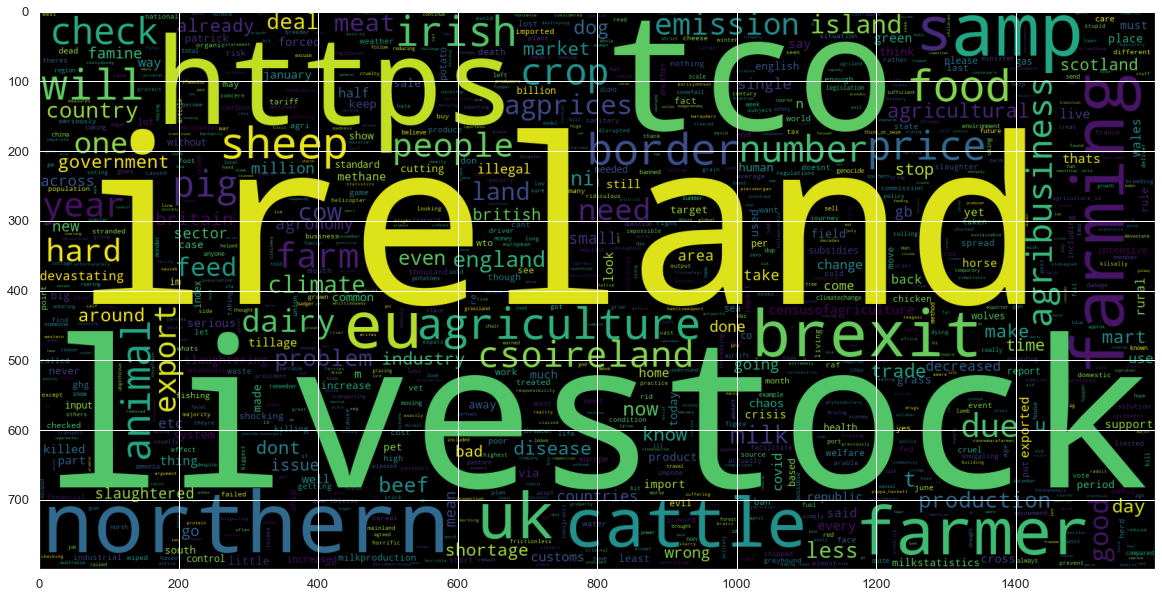

In [90]:
data_neg = df_fil_tweets['content'][df_fil_tweets['label']=='-1']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_neg))
plt.figure(figsize = (20,15))
plt.imshow(wc);

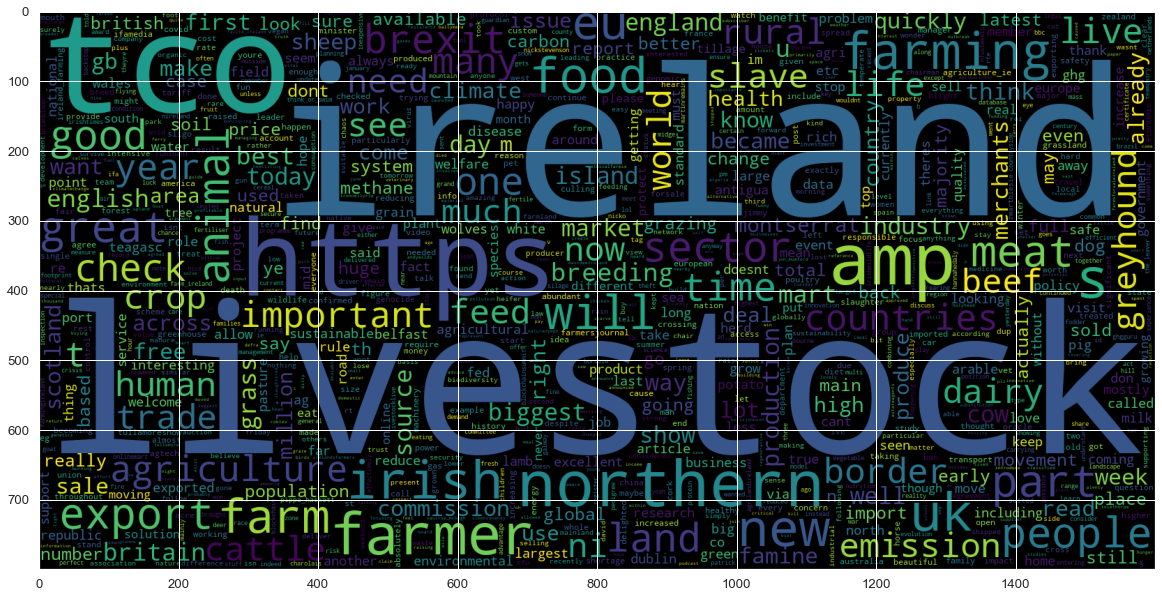

In [91]:
data_pos = df_fil_tweets['content'][df_fil_tweets['label']=='1']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,15))
plt.imshow(wc);

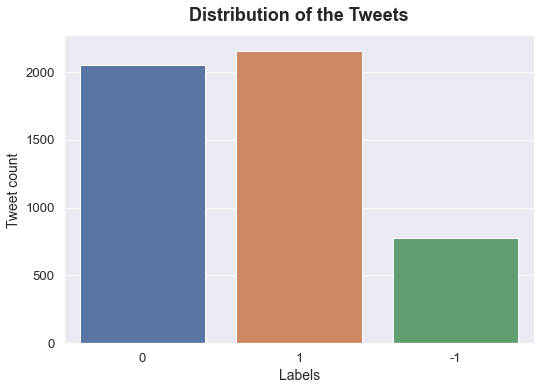

In [92]:
# Displaying distribution

sns.catplot("label", data=df_fil_tweets, aspect=1.5, kind="count") 
plt.title('Distribution of the Tweets', fontweight='bold', fontsize=18, pad=15)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Tweet count', fontsize=14)
plt.show()

In [93]:
df_fil_tweets['label'].value_counts()

1     2156
0     2051
-1     776
Name: label, dtype: int64

### Vectorization

In [94]:
vectorizer = CountVectorizer() #Create an instance, as usual

vectorizer.fit(df_fil_tweets['content']) #Like any sklearn model, it needs to be fit.

CountVectorizer()

In [95]:
transformed = vectorizer.transform(df_fil_tweets['content']) #Then, we can use the vectorizer to 'transform', or vectorize the cleaned data.
#We can store the data into variable called 'transformed'.

In [96]:
transformed.shape

(4983, 19888)

## Machine Learning models

In [97]:
X = transformed #These are the 'features', the X, that we will be plugging into the model...
y = df_fil_tweets['label'] 

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
#Just to speed up training time. We normally wouldn't want to make the test larger than the train.

#Stratifying is simply making sure that there is an equal amount of a class in a training set (e.g. 1k of label 1, 1k of label 2, etc.)
#Prevents overfitting to one specific class.

### Logistic Regression

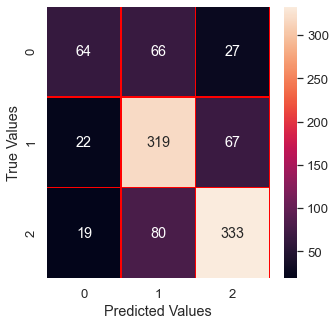

precision    recall  f1-score     support
-1             0.609524  0.407643  0.488550  157.000000
0              0.686022  0.781863  0.730813  408.000000
1              0.779859  0.770833  0.775320  432.000000
accuracy       0.718154  0.718154  0.718154    0.718154
macro avg      0.691802  0.653446  0.664894  997.000000
weighted avg   0.714635  0.718154  0.711948  997.000000

In [99]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

test_acc_lr = round(lr.score(X_test,y_test),4)
training_acc_lr = round(lr.score(X_train,y_train),4)
recall_lr = round(recall_score(y_test,y_pred,average='micro'),4)
f1_score_lr = round(f1_score(y_test,y_pred,average='micro'),4)

#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

clsf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('Your Classification Report Name.csv', index= True)
clsf_report

### Decision Tree Classifier

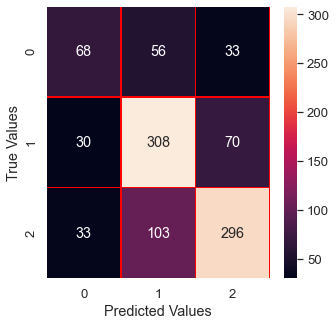

precision    recall  f1-score     support
-1             0.519084  0.433121  0.472222  157.000000
0              0.659529  0.754902  0.704000  408.000000
1              0.741855  0.685185  0.712395  432.000000
accuracy       0.674022  0.674022  0.674022    0.674022
macro avg      0.640156  0.624403  0.629539  997.000000
weighted avg   0.673084  0.674022  0.671139  997.000000

In [100]:
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)
y_pred = dec.predict(X_test)

test_acc_dec = round(dec.score(X_test,y_test),4)
training_acc_dec = round(dec.score(X_train,y_train),4)
recall_dec = round(recall_score(y_test,y_pred,average='micro'),4)
f1_score_dec = round(f1_score(y_test,y_pred,average='micro'),4)

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

clsf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('Your Classification Report Name.csv', index= True)
clsf_report


### Support Vector Machine (SVC)

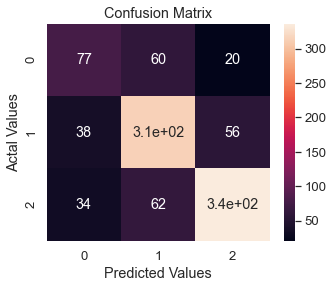

precision    recall  f1-score     support
-1             0.516779  0.490446  0.503268  157.000000
0              0.720183  0.769608  0.744076  408.000000
1              0.815534  0.777778  0.796209  432.000000
accuracy       0.729188  0.729188  0.729188    0.729188
macro avg      0.684165  0.679277  0.681184  997.000000
weighted avg   0.729468  0.729188  0.728744  997.000000

In [101]:
#We use Support Vector classifier as a classifier

#training the classifier using X_Train and y_train 
svc = SVC(kernel = 'linear').fit(X_train,y_train)
svc.predict(X_train)
#Testing the model using X_test and storing the output in y_pred
y_pred = svc.predict(X_test)
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_tunned = confusion_matrix(y_test, y_pred)

test_acc_svc = round(svc.score(X_test,y_test),4)
training_acc_svc = round(svc.score(X_train,y_train),4)
recall_svc = round(recall_score(y_test,y_pred,average='micro'),4)
f1_score_svc = round(f1_score(y_test,y_pred,average='micro'),4)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_tunned, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

clsf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('Your Classification Report Name.csv', index= True)
clsf_report

In [102]:
senti_models_scores_table = pd.DataFrame({'Logistic Regression':[test_acc_lr,training_acc_lr,recall_lr,f1_score_lr],
                                       'Decision Tree Classifier':[test_acc_dec,training_acc_dec,recall_dec,f1_score_dec],
                                        'Support Vector Machine':[test_acc_svc,training_acc_svc,recall_svc,f1_score_svc]},
                                   index=['Test accuracy', 'Training accuracy', 'Recall score','f1-score'])
    
    # Add 'Best Score' column
senti_models_scores_table['Best Score'] = senti_models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
senti_models_scores_table.head()

Logistic Regression  Decision Tree Classifier  \
Test accuracy                   0.7182                     0.674   
Training accuracy               0.9995                     1.000   
Recall score                    0.7182                     0.674   
f1-score                        0.7182                     0.674   

                   Support Vector Machine                Best Score  
Test accuracy                      0.7292    Support Vector Machine  
Training accuracy                  1.0000  Decision Tree Classifier  
Recall score                       0.7292    Support Vector Machine  
f1-score                           0.7292    Support Vector Machine

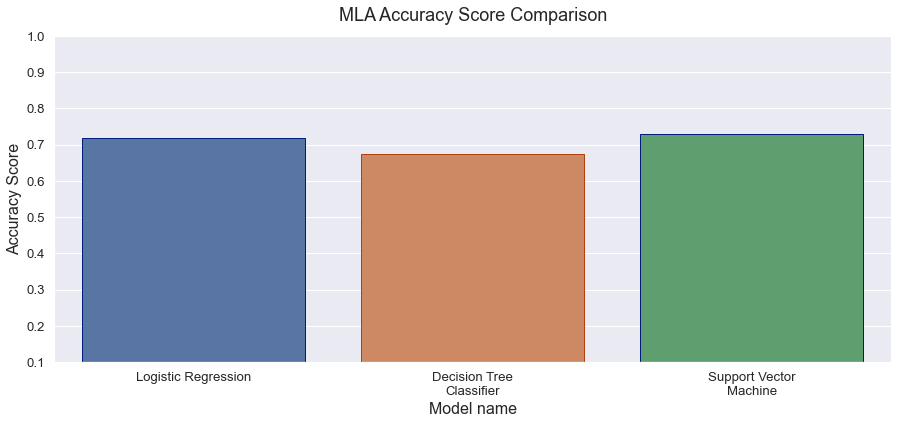

In [103]:
senti_models_scores_table.drop(['Best Score'],axis=1, inplace=True)
senti_models = ['Logistic Regression','Decision Tree\nClassifier','Support Vector\nMachine']

plt.subplots(figsize=(15,6))
plt.ylim([0.1,1])
sns.barplot(senti_models,senti_models_scores_table.iloc[3],edgecolor=sns.color_palette('dark',2))
plt.xticks()
plt.title('MLA Accuracy Score Comparison', fontsize=18, pad=15)
plt.xlabel('Model name', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=16);

## Model Tuning with Grid Search

### Logistic Regression

In [104]:
grid = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2']}
# C and penalty are logistic regression regularization parameters
# If C is too small model is underfitted, if C is too big model is overfitted.
# l1 and l2 are regularization loss functions (l1=lasso, l2=ridge)


# Creating GridSearchCV model:
lr_cv = GridSearchCV(lr, grid, cv=10) 
# Using lr model, grid parameters and cross validation of 10 (10 times of accuracy calculation will be applied) 

# Training the model:
lr_cv.fit(X_train, y_train)

print('best paremeters for logistic regression:',lr_cv.best_params_)
print('best score for logistic regression after grid search cv:{:.4f}'.format(lr_cv.best_score_))

best paremeters for logistic regression: {'C': 1000.0, 'penalty': 'l2'}
best score for logistic regression after grid search cv:0.7280


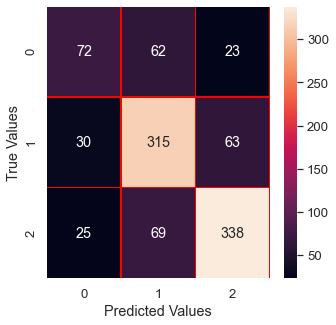

precision    recall  f1-score     support
-1             0.566929  0.458599  0.507042  157.000000
0              0.706278  0.772059  0.737705  408.000000
1              0.797170  0.782407  0.789720  432.000000
accuracy       0.727182  0.727182  0.727182    0.727182
macro avg      0.690126  0.671022  0.678156  997.000000
weighted avg   0.723718  0.727182  0.723920  997.000000

In [105]:
lr_tunned = LogisticRegression(C=1000.0, penalty='l2')

lr_tunned.fit(X_train, y_train)
y_pred_tunned = lr_tunned.predict(X_test)
conf_mat_tunned = confusion_matrix(y_test,y_pred_tunned)

test_acc_tun_lr = round(lr_tunned.score(X_test,y_test),4)
training_acc_tun_lr = round(lr_tunned.score(X_train,y_train),4)
recall_tun_lr = round(recall_score(y_test,y_pred_tunned,average='micro'),4)
f1_score_tun_lr = round(f1_score(y_test,y_pred_tunned,average='micro'),4)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_tunned,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

clsf_report = pd.DataFrame(classification_report(y_test, y_pred_tunned, output_dict=True)).transpose()
clsf_report

### Decision Tree Classifier

In [106]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9, 10],
              'criterion' :['gini', 'entropy']
             }
grid_search = GridSearchCV(estimator=dec, param_grid=param_grid, cv=10, verbose=1)
grid_search.fit(X_train, y_train)

final_model = grid_search.best_estimator_
final_model

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='sqrt')

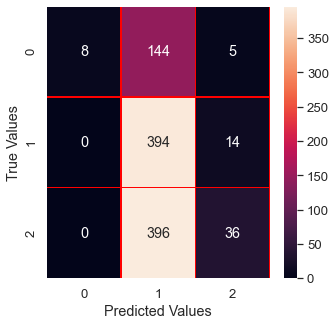

precision    recall  f1-score     support
-1             1.000000  0.050955  0.096970  157.000000
0              0.421842  0.965686  0.587183  408.000000
1              0.654545  0.083333  0.147844  432.000000
accuracy       0.439318  0.439318  0.439318    0.439318
macro avg      0.692129  0.366658  0.277332  997.000000
weighted avg   0.613716  0.439318  0.319622  997.000000

In [107]:
dec_tunned = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8, max_features='auto')
dec_tunned.fit(X_train,y_train)
y_pred_tun = dec_tunned.predict(X_test)

test_acc_tun_dec = round(dec_tunned.score(X_test,y_test),4)
training_acc_tun_dec = round(dec_tunned.score(X_train,y_train),4)
recall_tun_dec = round(recall_score(y_test,y_pred_tun,average='micro'),4)
f1_score_tun_dec = round(f1_score(y_test,y_pred_tun,average='micro'),4)

#Confusion Matrix
cm_tunned = confusion_matrix(y_test,y_pred_tun)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_tunned,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

clsf_report = pd.DataFrame(classification_report(y_test, y_pred_tun, output_dict=True)).transpose()
clsf_report.to_csv('Your Classification Report Name.csv', index= True)
clsf_report

### Support Vector Machine (SVM)

In [108]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001]} 
# Make grid search classifier
svm_grid = GridSearchCV(svc, param_grid, cv=10, verbose=1)

# Train the classifier
svm_grid.fit(X_train,y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", svm_grid.best_params_)
print("Best Estimators:\n", svm_grid.best_estimator_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters:
 {'C': 1, 'gamma': 1}
Best Estimators:
 SVC(C=1, gamma=1, kernel='linear')


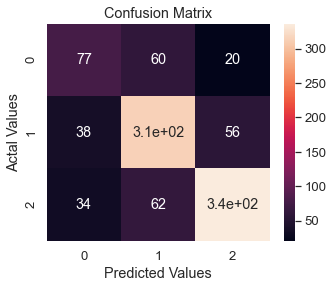

LR Test set Accuracy: 0.7292
LR Training set Accuracy: 1.0
Recall Score : 0.7292
F1 Score : 0.7292


precision    recall  f1-score     support
-1             0.516779  0.490446  0.503268  157.000000
0              0.720183  0.769608  0.744076  408.000000
1              0.815534  0.777778  0.796209  432.000000
accuracy       0.729188  0.729188  0.729188    0.729188
macro avg      0.684165  0.679277  0.681184  997.000000
weighted avg   0.729468  0.729188  0.728744  997.000000

In [109]:
svc_tunned  = SVC(kernel='linear', C = 1, gamma=1)
svc_tunned.fit(X_train,y_train)
y_pred_tunned = svc_tunned.predict(X_test)

test_acc_tun_svc = round(svc_tunned.score(X_test,y_test),4)
training_acc_tun_svc = round(svc_tunned.score(X_train,y_train),4)
recall_tun_svc = round(recall_score(y_test,y_pred_tunned,average='micro'),4)
f1_score_tun_svc = round(f1_score(y_test,y_pred_tunned,average='micro'),4)

cm_tunned = confusion_matrix(y_test, y_pred_tunned)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_tunned, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

print('LR Test set Accuracy:', test_acc_tun_svc)
print('LR Training set Accuracy:',training_acc_tun_svc)
print('Recall Score :',recall_tun_svc)
print('F1 Score :',f1_score_tun_svc)


clsf_report = pd.DataFrame(classification_report(y_test, y_pred_tunned, output_dict=True)).transpose()
clsf_report.to_csv('Your Classification Report Name.csv', index= True)
clsf_report

In [110]:
senti_tunned_models_scores_table = pd.DataFrame({'Logistic Regression':[test_acc_tun_lr,training_acc_tun_lr,recall_tun_lr,f1_score_tun_lr],
                                       'Decision Tree Classifier':[test_acc_tun_dec,training_acc_tun_dec,recall_tun_dec,f1_score_tun_dec],
                                        'Support Vector Machine':[test_acc_tun_svc,training_acc_tun_svc,recall_tun_svc,f1_score_tun_svc]},
                                   index=['Test accuracy', 'Training accuracy', 'Recall score','f1-score'])
    
    # Add 'Best Score' column
senti_tunned_models_scores_table['Best Score'] = senti_tunned_models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
senti_tunned_models_scores_table.head()

Logistic Regression  Decision Tree Classifier  \
Test accuracy                   0.7272                    0.4393   
Training accuracy               1.0000                    0.4604   
Recall score                    0.7272                    0.4393   
f1-score                        0.7272                    0.4393   

                   Support Vector Machine              Best Score  
Test accuracy                      0.7292  Support Vector Machine  
Training accuracy                  1.0000     Logistic Regression  
Recall score                       0.7292  Support Vector Machine  
f1-score                           0.7292  Support Vector Machine

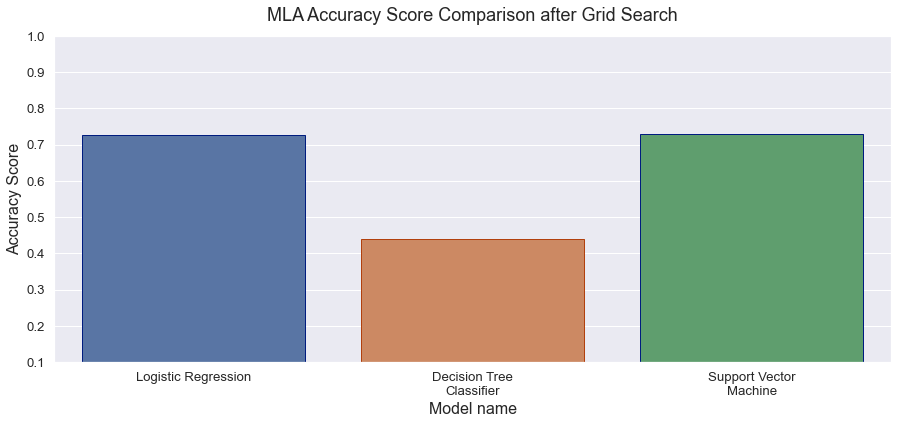

In [111]:
senti_tunned_models_scores_table.drop(['Best Score'],axis=1, inplace=True)

plt.subplots(figsize=(15,6))
plt.ylim([0.1,1])
sns.barplot(senti_models,senti_tunned_models_scores_table.iloc[3],edgecolor=sns.color_palette('dark',2))
plt.xticks()
plt.title('MLA Accuracy Score Comparison after Grid Search', fontsize=18, pad=15)
plt.xlabel('Model name', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=16);